## ASSIGNMENT - 2 

SAIHARISH SENTHILKUMARAN 21023211

### CO2 EMISSION VS GREENGAS EMISSION

### DATA PREPARATION

In [1]:
#!pip install pandas_datareader

In [2]:
import pandas as pd
import numpy as np
import wbgapi as wbg
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import wb

**LIST OF COUNTRIES TO BE ANALYZED**

In [3]:
'''
Collecting 10 countries which is part of individual continent regions and unique in economic growth,employment 
and population
'''
# list of 10 country codes
country_codes = ['AFG','BTN','CHN','GBR','IND','JPN','MYS','RUS','SAU','USA']

# dictionary object having Country code as key and names as values
country_names = {'AFG' : 'Afghanistan','BTN' : 'Bhutan','CHN' : 'China','GBR' : 'United Kingdom', 'IND' : 'India',
                 'JPN' : 'Japan', 'MYS' : 'Malaysia', 'RUS' : 'Russia Federation', 'SAU' : 'Saudi Arabia', 
                 'USA' : 'United States of America'}

# dictionary object having country codes as key and contients as values
country_groups = {'AFG' : 'South Asia','BTN': 'South Asia','CHN': 'East Asia','GBR': 'Europe','IND' : 'South Asia',
                  'JPN' : 'East Asia','MYS' : 'Asia','RUS' : 'Russia','SAU' : 'Middle East','USA' : 'North America'}

# dictionary object having country codes as key and size of land as value
country_sizes = {'AFG' : 'Small','BTN': 'Small','CHN': 'Large','GBR': 'Large','IND' : 'Large',
                  'JPN' : 'Small','MYS' : 'Small','RUS' : 'Large','SAU' : 'Small','USA' : 'Medium'}

In [4]:
indicator_id1 = ['CC.CO2.EMSE.EH','CC.CO2.EMSE.IP','CC.CO2.EMSE.MC','CC.CO2.EMSE.TR'] # C02 gas emission 
indicator_id2 = ['CC.GHG.EMSE.EH','CC.GHG.EMSE.IP','CC.GHG.EMSE.MC','CC.GHG.EMSE.TR'] # GHS Gas Emission Indicators

In [5]:
# Analyzing the years between 2015 to 2019
year = ['2014','2015','2016','2017','2018']
year

['2014', '2015', '2016', '2017', '2018']

In [6]:
# creating Multi-index with the help of country codes and year
ind = pd.MultiIndex.from_product([country_codes,year])

In [7]:
# creating Multi index dataframe as show above structure with the help of from_product()
index1 = pd.MultiIndex.from_product([country_codes, year],
                                   names=['Country', 'Year'])
columns1 = pd.MultiIndex.from_product([['CO2 EMISSION'], ['Electricity/Heat','Industrial Process', 
                                                          'Manufacturing/Construction','Transportation']],
                                   names=['Gas Emissions', 'Sectors'])

columns2 = pd.MultiIndex.from_product([['Greenhouse Gas EMISSION'], ['Electricity/Heat','Industrial Process', 
                                                          'Manufacturing/Construction','Transportation']],
                                   names=['Gas Emissions', 'Sectors'])


In [8]:
# By using panda_datareader downloading the data from World bank Data
df1 = wb.download(indicator = indicator_id1, country = country_codes, start=2014, end = 2018)
df2 = wb.download(indicator = indicator_id2, country = country_codes, start=2014, end = 2018)
df2

CC.GHG.EMSE.EH  CC.GHG.EMSE.IP  CC.GHG.EMSE.MC  \
country            year                                                   
Afghanistan        2018            0.22            1.06            3.29   
                   2017            0.21            0.91            3.44   
                   2016            0.20            0.76            2.95   
                   2015            0.17            0.59            2.89   
                   2014            0.17            0.53            3.67   
Bhutan             2018            0.00            0.40            0.37   
                   2017            0.00            0.39            0.35   
                   2016            0.00            0.39            0.29   
                   2015            0.00            0.33            0.20   
                   2014            0.00            0.29            0.23   
China              2018         5214.20         1166.29         2667.43   
                   2017         4904.12         1144.49         2734.18   
                   2016         4637.77         1122.48         2846.38   
                   2015         4580.61         1090.68         2972.98   
                   2014         4636.87         1112.43         3022.68   
United Kingdom     2018          106.64           19.14           31.96   
                   2017          114.60           20.26           32.98   
                   2016          125.94           21.52           32.07   
                   2015          150.35           22.13           39.16   
                   2014          170.88           22.05           40.57   
India              2018         1241.34          148.54          571.38   
                   2017         1157.77          130.52          558.99   
                   2016         1097.81          130.61          525.10   
                   2015         1103.23          130.19          503.78   
                   2014         1123.44          125.52          500.41   
Japan              2018          561.86           67.97          191.68   
                   2017          589.35           71.59          196.80   
                   2016          608.59           73.75          197.98   
                   2015          610.36           70.38          202.35   
                   2014          636.28           67.62          209.97   
Malaysia           2018          125.36           19.88           35.47   
                   2017          109.34           19.29           32.45   
                   2016          118.49           18.69           29.63   
                   2015          123.54           18.10           28.82   
                   2014          119.18           17.51           28.61   
Russian Federation 2018          844.67           54.58          250.55   
                   2017          835.58           54.91          262.09   
                   2016          840.13           55.27          259.78   
                   2015          879.86           56.25          249.98   
                   2014          907.38           61.00          247.03   
Saudi Arabia       2018          225.44           96.75          125.12   
                   2017          243.91           90.61          124.90   
                   2016          253.62           88.21          122.86   
                   2015          256.94           81.73          122.89   
                   2014          247.74           76.59          118.33   
United States      2018         2103.17          233.91          458.79   
                   2017         2064.52          227.96          429.41   
                   2016         2145.51          222.02          439.02   
                   2015         2234.02          221.22          433.89   
                   2014         2376.19          219.36          437.26   

                         CC.GHG.EMSE.TR  
country            year                  
Afghanistan        2018            3.73 

In [9]:
# Extracting Inner vaules from Multi index dataframe and converting it into list 
df1_list1 = df1[:][:].to_numpy().tolist()
# Converting the Co2 emission into its equivalent green house rates ie converting Methane, Nitrous oxide into GHS
df2_list2 = (df2[:][:]*25).to_numpy().tolist()

### DATAFRAME CREATION 

In [10]:
# create the Co2 Emission - DataFrame Outer row as Country, Column as Co2 Gas Emission sector
# Inner row as year with each value from the employment sector
CO2_emission_df = pd.DataFrame(df1_list1, index = index1, columns=columns1)
CO2_emission_df.head(5)

Gas Emissions     CO2 EMISSION                                                \
Sectors       Electricity/Heat Industrial Process Manufacturing/Construction   
Country Year                                                                   
AFG     2014              0.22               0.05                       3.29   
        2015              0.21               0.05                       3.44   
        2016              0.20               0.05                       2.95   
        2017              0.17               0.03                       2.89   
        2018              0.17               0.04                       3.67   

Gas Emissions                 
Sectors       Transportation  
Country Year                  
AFG     2014            3.73  
        2015            3.55  
        2016            4.16  
        2017            4.88  
        2018            3.87

In [11]:
CO2_emission_df.columns

MultiIndex([('CO2 EMISSION',           'Electricity/Heat'),
            ('CO2 EMISSION',         'Industrial Process'),
            ('CO2 EMISSION', 'Manufacturing/Construction'),
            ('CO2 EMISSION',             'Transportation')],
           names=['Gas Emissions', 'Sectors'])

In [12]:
CO2_emission_df.describe()

Gas Emissions     CO2 EMISSION                                                \
Sectors       Electricity/Heat Industrial Process Manufacturing/Construction   
count                50.000000           50.00000                  50.000000   
mean               1008.551400          100.66040                 446.667800   
std                1434.656797          225.67433                 829.152324   
min                   0.000000            0.03000                   0.200000   
25%                 115.572500            4.42000                  30.212500   
50%                 409.400000           23.53500                 158.400000   
75%                1118.387500           39.79250                 436.417500   
max                5214.200000          782.00000                3022.680000   

Gas Emissions                 
Sectors       Transportation  
count              50.000000  
mean              360.962000  
std               510.314018  
min                 0.400000  
25%                61.630000  
50%               175.750000  
75%               266.765000  
max              1762.240000

In [13]:
# We can compare each country’s total contribution to global emissions by looking at cumulative CO2. 
# We can calculate cumulative emissions by adding up each country’s annual CO2 emissions over time. 
co2_cumsum = CO2_emission_df.groupby(['Country'], as_index=True).agg(
    {
        ('CO2 EMISSION', 'Electricity/Heat'): ['mean','min','max'],
        ('CO2 EMISSION', 'Industrial Process'): ['mean','min','max'],
        ('CO2 EMISSION', 'Manufacturing/Construction'): ['mean', 'min', 'max']
    }
)
co2_cumsum.head(10)

Gas Emissions     CO2 EMISSION                                               \
Sectors       Electricity/Heat                   Industrial Process           
                          mean      min      max               mean     min   
Country                                                                       
AFG                      0.194     0.17     0.22              0.044    0.03   
BTN                      0.000     0.00     0.00              0.328    0.26   
CHN                   4794.714  4580.61  5214.20            764.000  733.70   
GBR                    133.682   106.64   170.88              4.408    4.22   
IND                   1144.718  1097.81  1241.34            112.920  108.00   
JPN                    601.288   561.86   636.28             26.066   25.43   
MYS                    119.182   109.34   125.36              9.574    9.47   
RUS                    861.524   835.58   907.38             22.146   20.34   
SAU                    245.530   225.44   256.94             27.054   22.87   
USA                   2184.682  2064.52  2376.19             40.064   39.44   

Gas Emissions                                                       
Sectors               Manufacturing/Construction                    
                  max                       mean      min      max  
Country                                                             
AFG              0.05                      3.248     2.89     3.67  
BTN              0.36                      0.288     0.20     0.37  
CHN            782.00                   2848.730  2667.43  3022.68  
GBR              4.55                     35.348    31.96    40.57  
IND            125.30                    531.932   500.41   571.38  
JPN             26.56                    199.756   191.68   209.97  
MYS              9.60                     30.996    28.61    35.47  
RUS             26.37                    253.886   247.03   262.09  
SAU             29.85                    122.820   118.33   125.12  
USA             41.21                    439.674   429.41   458.79

In [14]:
co2_cumsum.describe()

Gas Emissions     CO2 EMISSION                                               \
Sectors       Electricity/Heat                           Industrial Process   
                          mean          min          max               mean   
count                10.000000    10.000000    10.000000          10.000000   
mean               1008.551400   958.197000  1092.879000         100.660400   
std                1494.317716  1428.131407  1625.162026         235.405063   
min                   0.000000     0.000000     0.000000           0.044000   
25%                 122.807000   107.315000   136.740000           5.699500   
50%                 423.409000   393.650000   446.610000          24.106000   
75%                1073.919500  1032.252500  1157.850000          36.811500   
max                4794.714000  4580.610000  5214.200000         764.000000   

Gas Emissions                                                                  \
Sectors                               Manufacturing/Construction                
                      min         max                       mean          min   
count           10.000000   10.000000                  10.000000    10.000000   
mean            96.376000  104.585000                 446.667800   421.795000   
std            226.161905  240.819656                 863.974822   808.599001   
min              0.030000    0.050000                   0.288000     0.200000   
25%              5.532500    5.812500                  32.084000    29.447500   
50%             21.605000   26.465000                 161.288000   155.005000   
75%             35.937500   38.370000                 393.227000   383.815000   
max            733.700000  782.000000                2848.730000  2667.430000   

Gas Emissions               
Sectors                     
                       max  
count            10.000000  
mean            473.011000  
std             916.970551  
min               0.370000  
25%              36.745000  
50%             167.545000  
75%             409.615000  
max            3022.680000

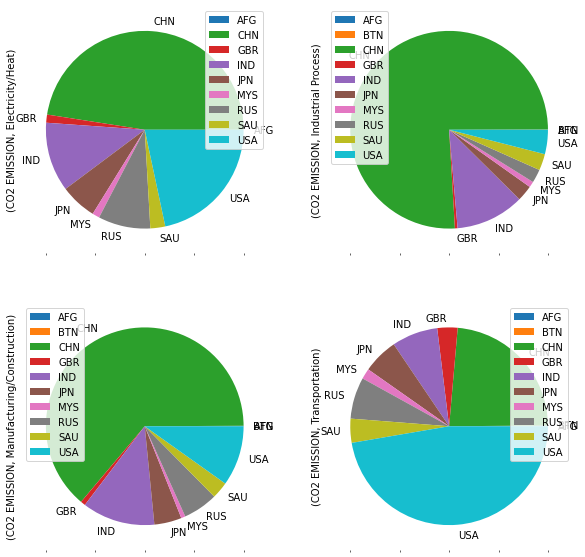

<Figure size 432x288 with 0 Axes>

In [15]:
total_co2_emission_sum = CO2_emission_df.groupby(['Country']).sum()
total_co2_emission_sum.plot(kind='pie', subplots=True, rot=0, figsize=(10, 10), layout=(2, 2))
plt.savefig('total_co2_emission_sum.png')
plt.show()
plt.tight_layout()

In [16]:
co2 = CO2_emission_df.sort_values(('CO2 EMISSION', 'Transportation'), ascending=False)
co2[:10]

Gas Emissions     CO2 EMISSION                                                \
Sectors       Electricity/Heat Industrial Process Manufacturing/Construction   
Country Year                                                                   
USA     2014           2103.17              41.21                     458.79   
        2015           2064.52              40.32                     429.41   
        2016           2145.51              39.44                     439.02   
        2017           2234.02              39.91                     433.89   
        2018           2376.19              39.44                     437.26   
CHN     2014           5214.20             782.00                    2667.43   
        2015           4904.12             769.30                    2734.18   
        2016           4637.77             756.40                    2846.38   
        2017           4580.61             733.70                    2972.98   
        2018           4636.87             778.60                    3022.68   

Gas Emissions                 
Sectors       Transportation  
Country Year                  
USA     2014         1762.24  
        2015         1724.02  
        2016         1711.22  
        2017         1700.05  
        2018         1639.85  
CHN     2014          917.02  
        2015          880.90  
        2016          843.42  
        2017          827.14  
        2018          770.56

**As we can see, USA has the highest gas emission in the past few years according to Transportation.**

### Plotting USA Dataframe Emission

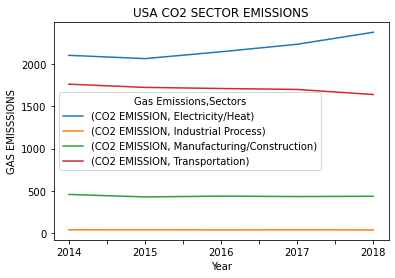

In [17]:
Co2_emission_USA = co2.loc['USA']
Co2_emission_USA.plot.line(title="USA CO2 SECTOR EMISSIONS")
plt.ylabel('GAS EMISSSIONS')
plt.show(block=True);

By above graph, we can find out In USA - Electricity and Heat are the main reason used for household purpose 
consumption releases more Co2 (**2376.19 Mt Tons**) gases in the recent years comparatively than others.

On the Contrary, we can see Industrial process follow the GHS safety measures the emissions are much less than the others sectors. Also there is no much deviation from the mean value.(**39.44MT Tons**)



## GREENHOUSE GAS EMISSION

In [18]:
GHG_emission_df = pd.DataFrame(df2_list2, index = index1, columns=columns2)
GHG_emission_df.head(15)

Gas Emissions Greenhouse Gas EMISSION                     \
Sectors              Electricity/Heat Industrial Process   
Country Year                                               
AFG     2014                     5.50              26.50   
        2015                     5.25              22.75   
        2016                     5.00              19.00   
        2017                     4.25              14.75   
        2018                     4.25              13.25   
BTN     2014                     0.00              10.00   
        2015                     0.00               9.75   
        2016                     0.00               9.75   
        2017                     0.00               8.25   
        2018                     0.00               7.25   
CHN     2014                130355.00           29157.25   
        2015                122603.00           28612.25   
        2016                115944.25           28062.00   
        2017                114515.25           27267.00   
        2018                115921.75           27810.75   

Gas Emissions                                            
Sectors       Manufacturing/Construction Transportation  
Country Year                                             
AFG     2014                       82.25          93.25  
        2015                       86.00          88.75  
        2016                       73.75         104.00  
        2017                       72.25         122.00  
        2018                       91.75          96.75  
BTN     2014                        9.25          15.00  
        2015                        8.75          14.25  
        2016                        7.25          13.50  
        2017                        5.00          10.75  
        2018                        5.75          10.00  
CHN     2014                    66685.75       22925.50  
        2015                    68354.50       22022.50  
        2016                    71159.50       21085.50  
        2017                    74324.50       20678.50  
        2018                    75567.00       19264.00

In [19]:
GHG_emission_df.columns

MultiIndex([('Greenhouse Gas EMISSION',           'Electricity/Heat'),
            ('Greenhouse Gas EMISSION',         'Industrial Process'),
            ('Greenhouse Gas EMISSION', 'Manufacturing/Construction'),
            ('Greenhouse Gas EMISSION',             'Transportation')],
           names=['Gas Emissions', 'Sectors'])

In [20]:
GHG_emission_df.describe()

Gas Emissions Greenhouse Gas EMISSION                     \
Sectors              Electricity/Heat Industrial Process   
count                       50.000000          50.000000   
mean                     25213.785000        4348.825000   
std                      35866.419935        8197.620484   
min                          0.000000           7.250000   
25%                       2889.312500         470.062500   
50%                      10235.000000        1607.750000   
75%                      27959.687500        3260.937500   
max                     130355.000000       29157.250000   

Gas Emissions                                            
Sectors       Manufacturing/Construction Transportation  
count                          50.000000      50.000000  
mean                        11166.695000    9024.050000  
std                         20728.808106   12757.850461  
min                             5.000000      10.000000  
25%                           755.312500    1540.750000  
50%                          3960.000000    4393.750000  
75%                         10910.437500    6669.125000  
max                         75567.000000   44056.000000

In [21]:
GHS = GHG_emission_df.sort_values(('Greenhouse Gas EMISSION', 'Industrial Process'), ascending=False)
GHS[:10]

Gas Emissions Greenhouse Gas EMISSION                     \
Sectors              Electricity/Heat Industrial Process   
Country Year                                               
CHN     2014                130355.00           29157.25   
        2015                122603.00           28612.25   
        2016                115944.25           28062.00   
        2018                115921.75           27810.75   
        2017                114515.25           27267.00   
USA     2014                 52579.25            5847.75   
        2015                 51613.00            5699.00   
        2016                 53637.75            5550.50   
        2017                 55850.50            5530.50   
        2018                 59404.75            5484.00   

Gas Emissions                                            
Sectors       Manufacturing/Construction Transportation  
Country Year                                             
CHN     2014                    66685.75       22925.50  
        2015                    68354.50       22022.50  
        2016                    71159.50       21085.50  
        2018                    75567.00       19264.00  
        2017                    74324.50       20678.50  
USA     2014                    11469.75       44056.00  
        2015                    10735.25       43100.50  
        2016                    10975.50       42780.50  
        2017                    10847.25       42501.25  
        2018                    10931.50       40996.25

From above analysis, we can find out emitting Greenhouse gases

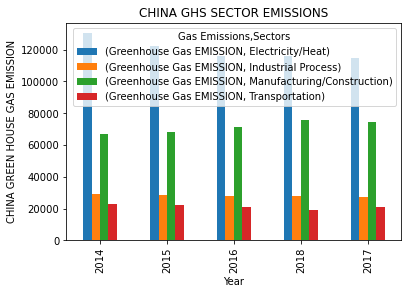

In [22]:
ghs_emission_CHN = GHS.loc['CHN']
ghs_emission_CHN.plot.bar(title="CHINA GHS SECTOR EMISSIONS");
plt.ylabel('CHINA GREEN HOUSE GAS EMISSION')
plt.show(block=True);

In [23]:
ghs_emission_CHN

Gas Emissions Greenhouse Gas EMISSION                     \
Sectors              Electricity/Heat Industrial Process   
Year                                                       
2014                        130355.00           29157.25   
2015                        122603.00           28612.25   
2016                        115944.25           28062.00   
2018                        115921.75           27810.75   
2017                        114515.25           27267.00   

Gas Emissions                                            
Sectors       Manufacturing/Construction Transportation  
Year                                                     
2014                            66685.75        22925.5  
2015                            68354.50        22022.5  
2016                            71159.50        21085.5  
2018                            75567.00        19264.0  
2017                            74324.50        20678.5

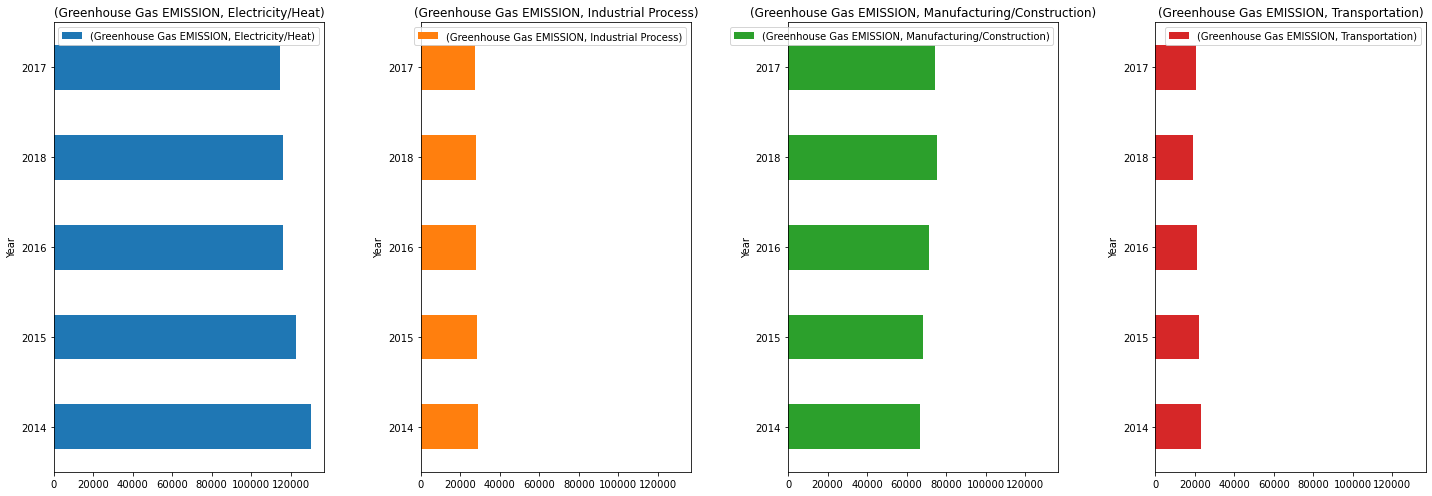

In [24]:
ax = ghs_emission_CHN.plot(kind='barh', subplots=True, rot=0, figsize=(20, 7), layout=(1, 4))
plt.tight_layout()


### Merging Two Dataframe into an one Dataframe using Join functionality

In [25]:
# Using Merge function inner joining the dataframed by country and year
emissions_df = pd.merge(CO2_emission_df, GHG_emission_df, on = ['Country','Year'])
emissions_df.head()

Gas Emissions     CO2 EMISSION                                                \
Sectors       Electricity/Heat Industrial Process Manufacturing/Construction   
Country Year                                                                   
AFG     2014              0.22               0.05                       3.29   
        2015              0.21               0.05                       3.44   
        2016              0.20               0.05                       2.95   
        2017              0.17               0.03                       2.89   
        2018              0.17               0.04                       3.67   

Gas Emissions                Greenhouse Gas EMISSION                     \
Sectors       Transportation        Electricity/Heat Industrial Process   
Country Year                                                              
AFG     2014            3.73                    5.50              26.50   
        2015            3.55                    5.25              22.75   
        2016            4.16                    5.00              19.00   
        2017            4.88                    4.25              14.75   
        2018            3.87                    4.25              13.25   

Gas Emissions                                            
Sectors       Manufacturing/Construction Transportation  
Country Year                                             
AFG     2014                       82.25          93.25  
        2015                       86.00          88.75  
        2016                       73.75         104.00  
        2017                       72.25         122.00  
        2018                       91.75          96.75

In [26]:
emissions_df.columns

MultiIndex([(           'CO2 EMISSION',           'Electricity/Heat'),
            (           'CO2 EMISSION',         'Industrial Process'),
            (           'CO2 EMISSION', 'Manufacturing/Construction'),
            (           'CO2 EMISSION',             'Transportation'),
            ('Greenhouse Gas EMISSION',           'Electricity/Heat'),
            ('Greenhouse Gas EMISSION',         'Industrial Process'),
            ('Greenhouse Gas EMISSION', 'Manufacturing/Construction'),
            ('Greenhouse Gas EMISSION',             'Transportation')],
           names=['Gas Emissions', 'Sectors'])

<AxesSubplot:xlabel='Country', ylabel="('CO2 EMISSION', 'Industrial Process')">

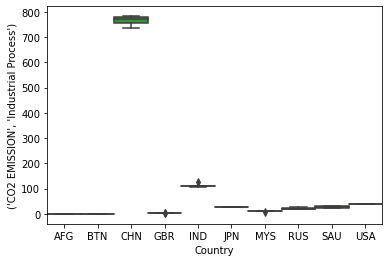

In [27]:
import seaborn as sns
sns.boxplot(x="Country", y=('CO2 EMISSION', 'Industrial Process'), data=emissions_df.reset_index(),width=1,)

By looking into the above, box plot clearly we can find out China has the largest CO2 & Greenhouse gas emission for the 
sector Industrial Process, following by India were the difference between first and second are much high comparatively 
than the other sectors.
